In [2]:
from nilearn import plotting
import nibabel as nib

img = nib.load('data/tr_im.nii.gz').get_fdata()
mask = nib.load('data/tr_mask.nii.gz').get_fdata()

In [3]:
import numpy as np

np.unique(mask)

array([0., 1., 2., 3.])

In [4]:
img.shape

(512, 512, 100)

In [5]:
mask.shape

(512, 512, 100)

In [8]:
# convert img to RGB channel

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(np.uint8)

img_rgb = np.zeros( ( np.array(img).shape[0], np.array(img).shape[1], 3, np.array(img).shape[2]), dtype=int)

img_rgb[:,:,0,:] = img
img_rgb[:,:,1,:] = img
img_rgb[:,:,2,:] = img

# image = np.rot90(img_rgb, 3)

# for i in range(img_rgb.shape[3]):
#     plt.imshow(image[:,:,:,i])
#     plt.show()

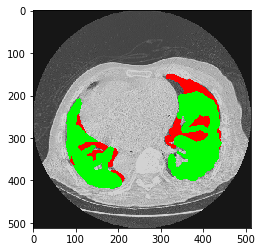

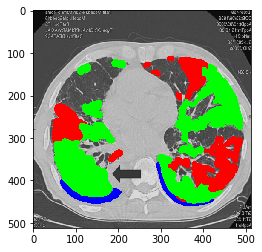

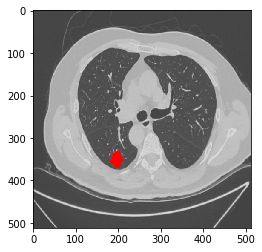

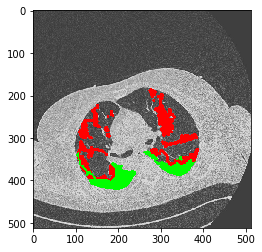

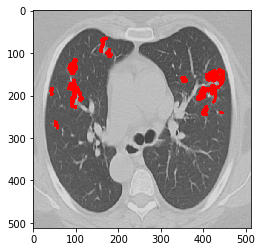

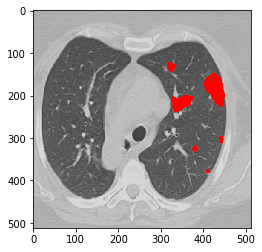

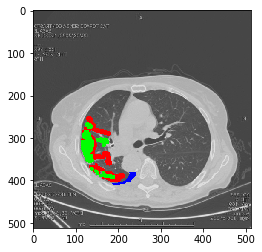

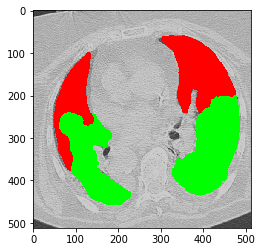

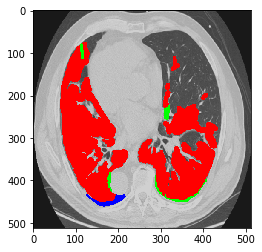

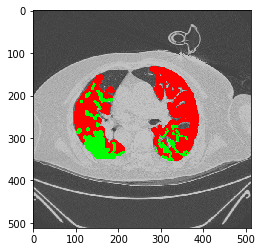

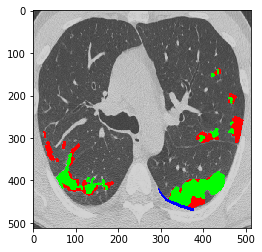

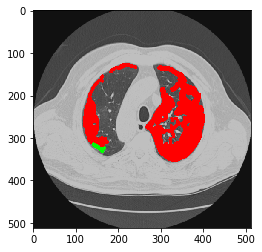

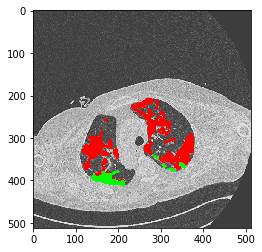

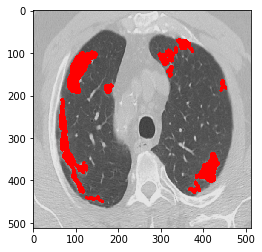

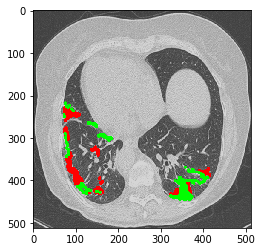

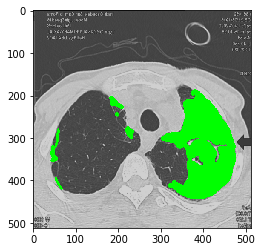

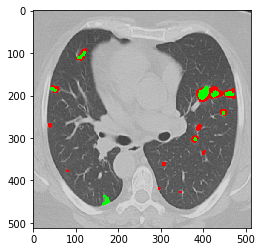

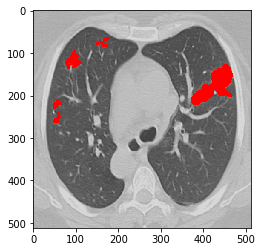

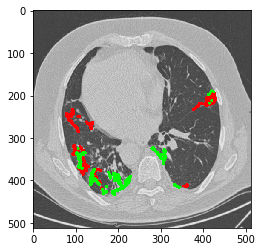

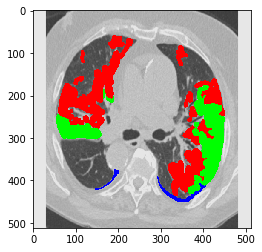

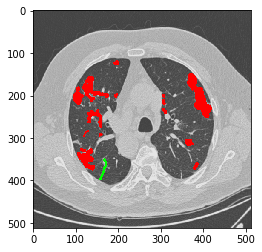

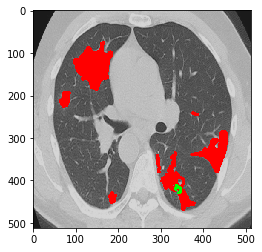

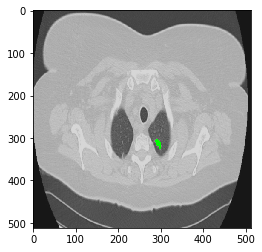

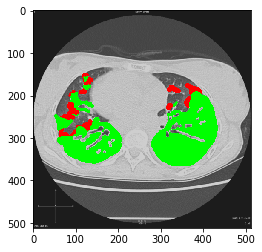

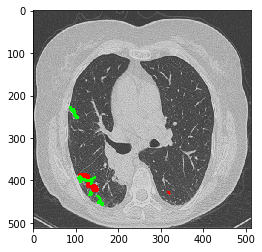

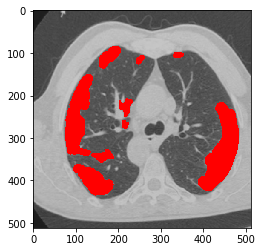

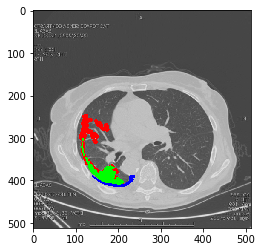

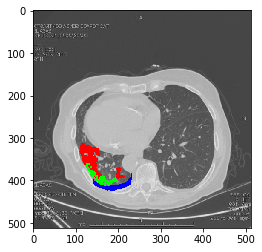

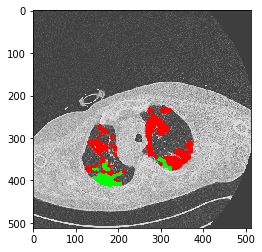

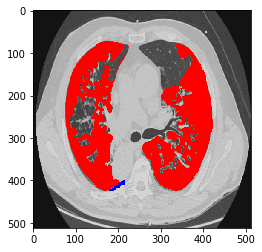

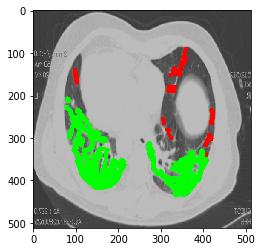

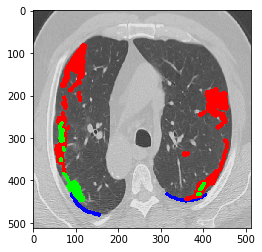

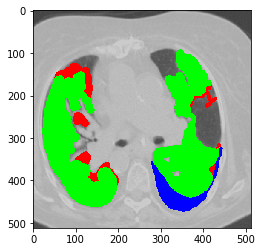

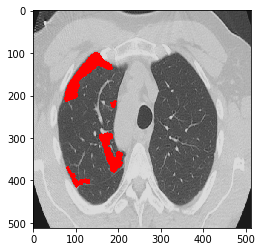

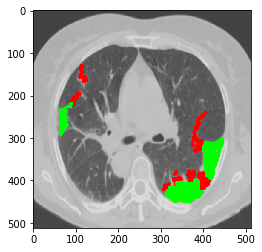

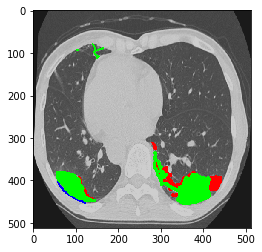

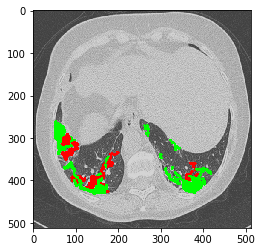

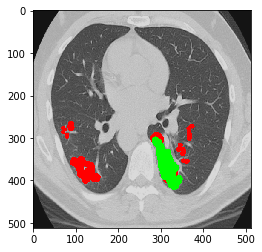

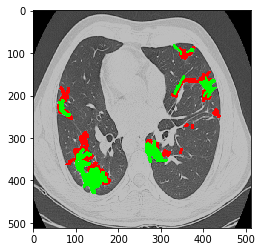

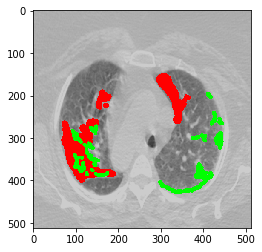

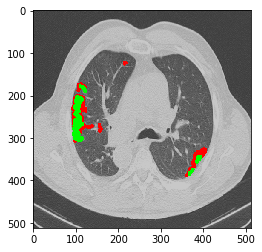

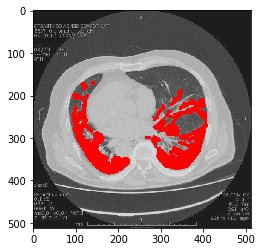

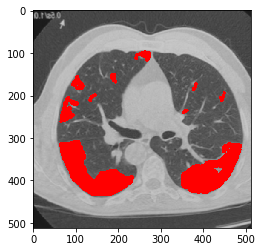

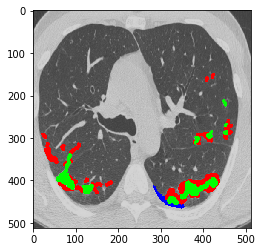

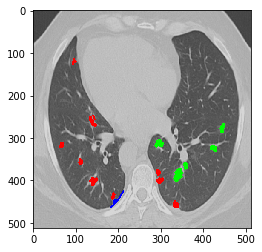

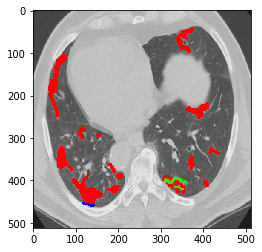

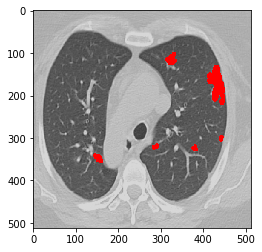

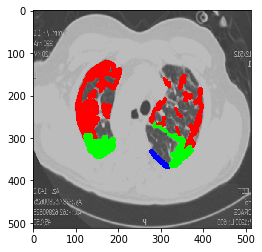

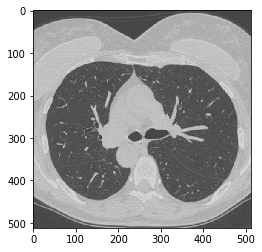

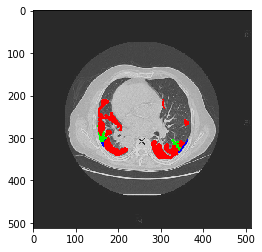

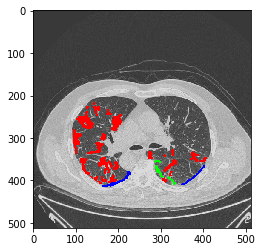

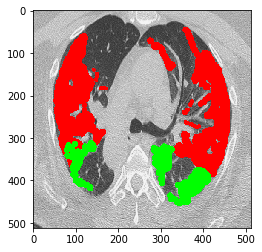

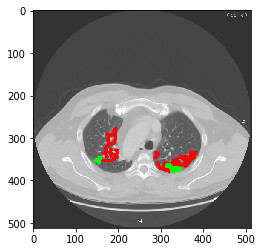

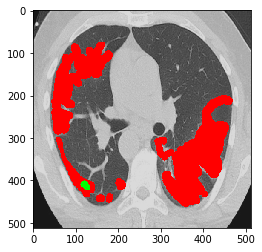

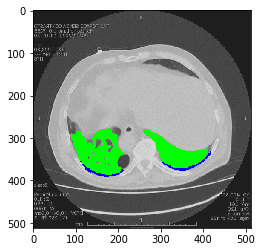

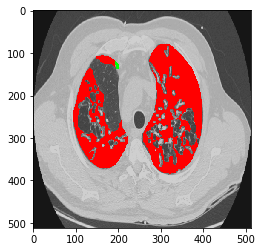

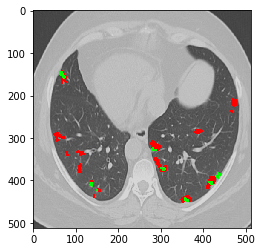

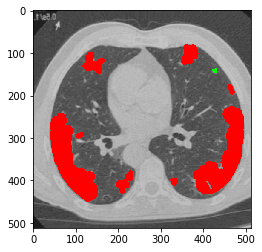

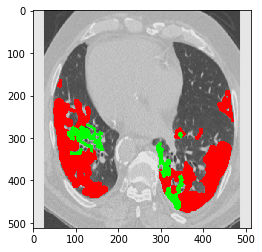

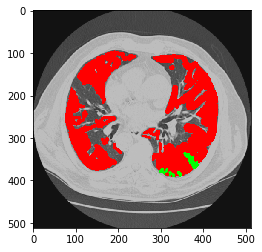

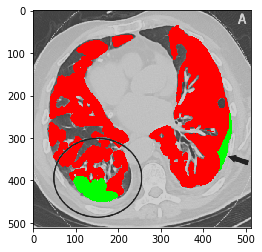

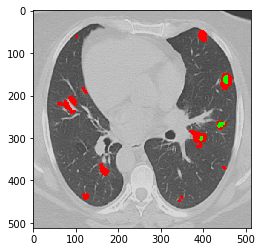

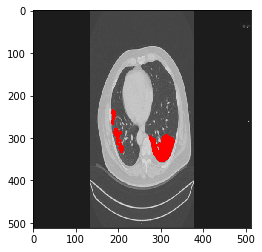

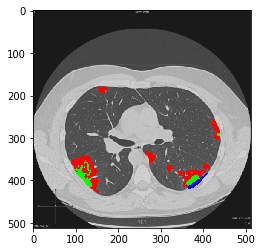

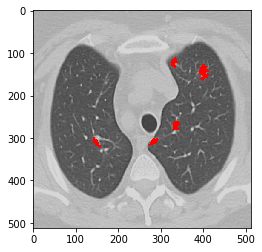

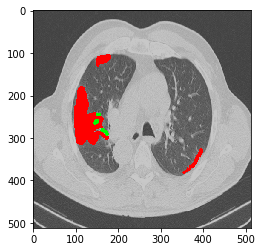

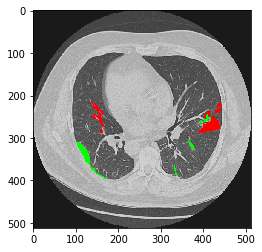

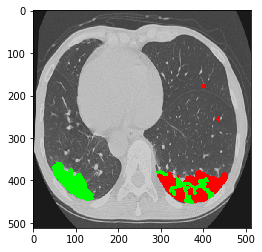

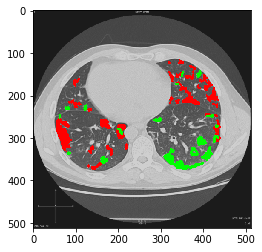

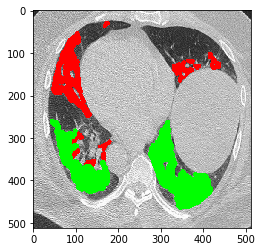

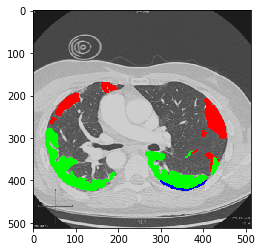

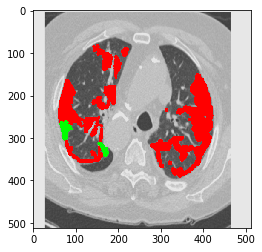

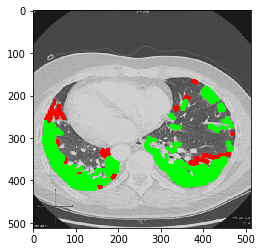

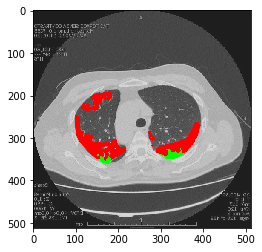

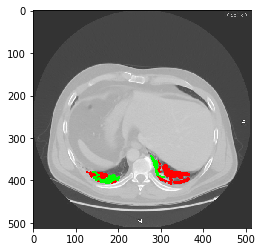

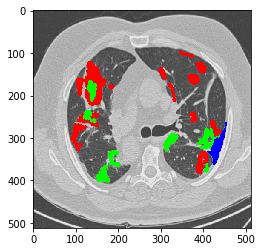

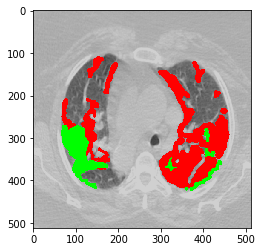

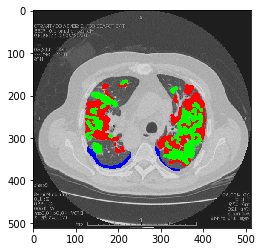

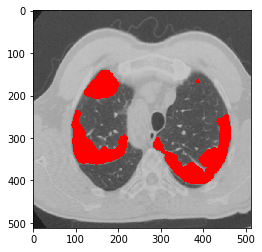

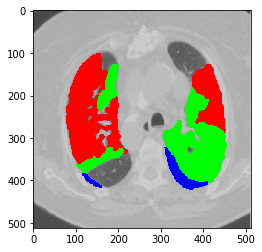

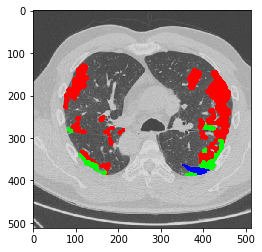

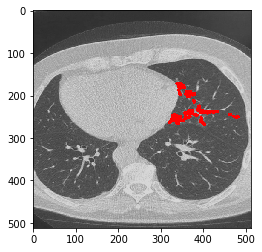

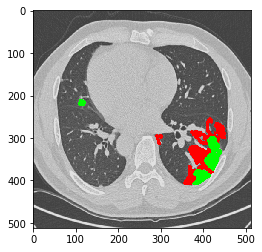

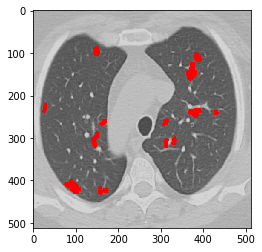

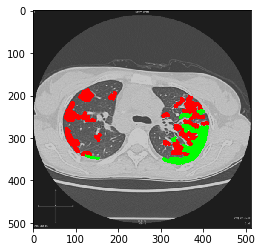

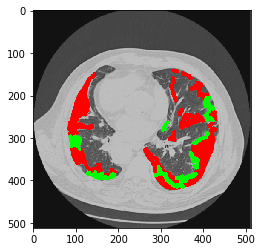

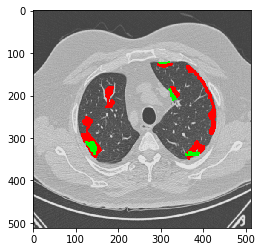

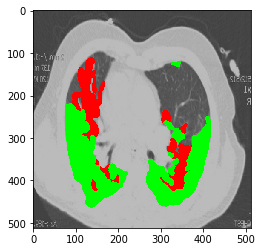

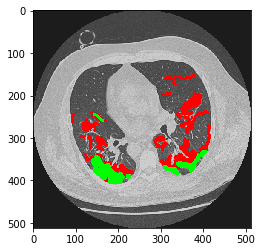

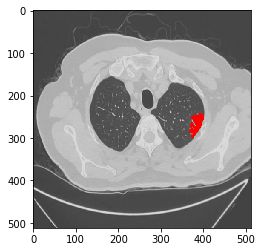

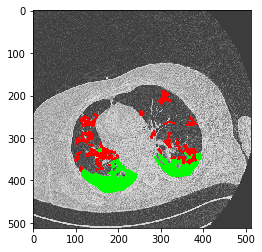

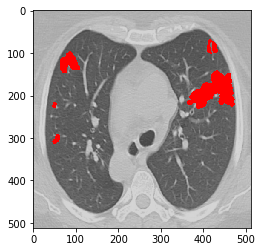

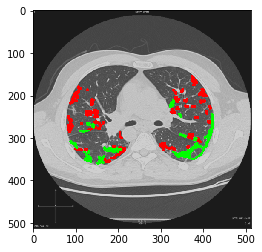

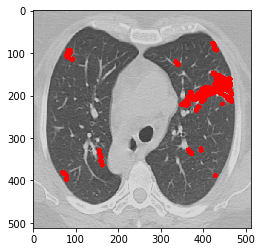

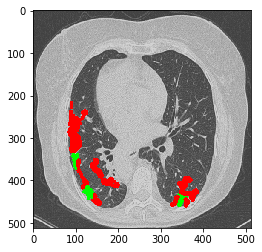

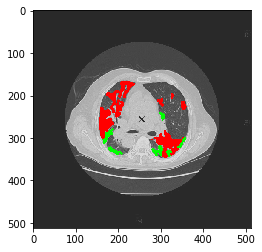

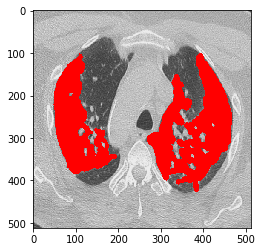

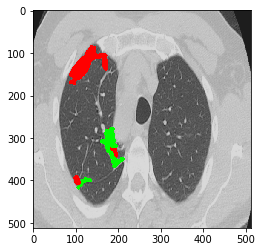

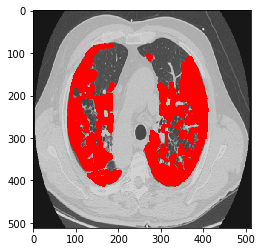

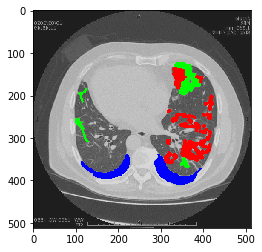

In [21]:
# generate labeled_img

labeled_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(np.uint8)

# filter out infection part
labeled_img[np.nonzero(mask)] = 0

# convert to RGB
labeled_img_rgb = np.zeros( ( np.array(img).shape[0], np.array(img).shape[1], 3, np.array(img).shape[2]), dtype=int)

labeled_img_rgb[:,:,0,:] = labeled_img
labeled_img_rgb[:,:,1,:] = labeled_img
labeled_img_rgb[:,:,2,:] = labeled_img

# convert mask to RGB
mask_rgb = np.zeros( ( np.array(mask).shape[0], np.array(mask).shape[1], 3, np.array(mask).shape[2]), dtype=int)

mask_rgb[:,:,0,:] = np.where(mask==1, 1, 0)
mask_rgb[:,:,1,:] = np.where(mask==2, 1, 0)
mask_rgb[:,:,2,:] = np.where(mask==3, 1, 0)

# print(np.unique(mask_rgb))
mask_rgb = mask_rgb * 255

# add segmentation mask
labeled_img_rgb += mask_rgb

image = np.rot90(labeled_img_rgb, 3)

for i in range(labeled_img_rgb.shape[3]):
    plt.imshow(image[:,:,:,i])
    plt.show()